<a href="https://colab.research.google.com/github/ngupta23/ds7337_nlp/blob/master/Homework/NGupta_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
## Author: Nikhil Gupta

In [1]:
from math import floor
from typing import List, Tuple

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers 
from sklearn import datasets
print(tf.__version__)

2.2.0


## 1.1 Classification Problem (Digits Dataset)

In [0]:
data = datasets.load_digits()
X = data['data']
y = data['target']

In [3]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [4]:
print(f"Min Label: {np.min(y)}")
print(f"Max Label: {np.max(y)}")

Min Label: 0
Max Label: 9


**The inputs are an 8x8 image (of a single digit number) that have been unrolled into a 1x64 array. There are 1797 such images in the data. The output is a number from 0 to 9 indicating the digit in the image.**

### Scaling the data
The data come more or less scaled to the same scale for all of the 64 features, although some of the 64 pixeld (features) do not go all the way till 16. Hence we will proceed with the scaling the feature values to be between 0 and 1 as a best practice.

In [5]:
print(np.max(X, axis=0))

[ 0.  8. 16. 16. 16. 16. 16. 15.  2. 16. 16. 16. 16. 16. 16. 12.  2. 16.
 16. 16. 16. 16. 16.  8.  1. 15. 16. 16. 16. 16. 15.  1.  0. 14. 16. 16.
 16. 16. 14.  0.  4. 16. 16. 16. 16. 16. 16.  6.  8. 16. 16. 16. 16. 16.
 16. 13.  1.  9. 16. 16. 16. 16. 16. 16.]


In [6]:
print(np.min(X, axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [8]:
print(np.max(X_scaled, axis=0))

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
print(np.min(X_scaled, axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Train/Validation Split

#### Question 1A: How did you know when you were done training? 
**We will split the data into a train and validation split. We will use the train split to train the model (over a large number of epochs) and the validation data to check if the model is able to generalize well (not overfitting). If we do not see an improvement in the validation metric over several epochs (or if it deteriorates), it could be an indication that the model may have started to overfit. Hence we can use this as in indication of when to stop the training process. This is called early stopping**.

In [0]:
from sklearn.model_selection import train_test_split
# 80% Training 20% Validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [0]:
from time import time
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import shutil
shutil.rmtree("./logs", ignore_errors=True) # deletes a directory and all its contents
tb = TensorBoard()
# If validation error does not improve for 10 epochs, then terminate the training
es = EarlyStopping(min_delta=0,patience=10)  

#### Question 1B: How did you optimize your parameters?
**The parameter optimization in neural networks is performed using back propagation. The weights are updated by moving in the direction opposite to the gradient of the loss with respect to the weights. In the neural network this is performed by optimizers as outlined below.**

* **Optimizer**: Traditionally, Stocastic Gradient Descent (SGD) was used, but this can be quite slow for Neural Networks as it can get stuck in local minima. Many researchers prefer to use the Adaptive Moment Estimation **([Adam](https://www.youtube.com/watch?v=JXQT_vxqwIs)) optimizer** which has been shown to be considerably faster than SGD. We will use this in our training as a default. The parameters of the optimizer will be left at the default values. The metric used to calculate the loss was **`accuracy`**.

**Unfortunately, there are no strict rules that can guide how the hyperparameters are chosen. However, we can use some industry standard settings. For example**

* The **number of neurons** in the layers is generally chosen to be in powers of 2. This may be due to the fact that this causes the weight matrices to fit into memory more efficiently since the computers memory is also addressed using binary data. While this may be true for large neural networks, our network is likely going to be very small by those standards and hence it should not matter if we choose the number of neurons to be powers of 2 or not. In any case, we will continue to use this practice. After experimenting a little with this, we settled on 128 neurons for the first hidden layer and 64 for the second hidden layer.
* **Activation Function:** Sigmoid and Tanh activation functions suffer from the problem of vanishing gradient since the max gradient can be 0.25 and 1 respectively at weight  = 0 and quickly becomes small as the weight deviates from 0. When we have multiple layers, this can get multiplied several times and result in a very small gradient which slows down the training. Hence many reserchers prefer to use Relu activation function (or its variants) as a default (gradient = 1 when the weight > 0). Although, we will not use a very deep network in this example, we will continue to use this best practice. Also, since this is a classification problem, we will use a Sigmoid activation for the last layer (10 neurons) and use **`SparseCategoricalCrossentropy`** as the loss function wich will take care of the one hot encoding.
* **Number of layers:** We want to add at least 1 hidden layer in order to capture the non-linearities in the data. In this example, after a little trial and error, 2 hidden layers was found to be more appropriate. Unfortunately, there is no easy rule of thumb to determine the number of layers ahead of time so some trial and error is needed here.
* **Dropout:** A dropout layer could be added after each hidden layer if we feel that the model is overfitting. It was not needed in this case.
* **Batch Size:** Again, there are no hard and fast rules here. Researchers prefer to use powers to 2 here so that the matrices fit in the memory efficiently. Also, we want the batch size to be small enough so as not to slow dows the training but not so small that the training starts to become noisy. We will use a batch size of 32, but this could be experimented with if needed.

In [0]:
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10 ,activation='sigmoid'))

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Since our labels are integers, we will use this loss function which will one hot encode it internally
              metrics=['accuracy'])

In [15]:
tf.random.set_seed(42)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1000, batch_size=32, callbacks=[tb, es])

Epoch 1/1000
45/45 [==============================] - 0s 7ms/step - loss: 1.9460 - accuracy: 0.4447 - val_loss: 1.3907 - val_accuracy: 0.7889
Epoch 2/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.8138 - accuracy: 0.8580 - val_loss: 0.4663 - val_accuracy: 0.8944
Epoch 3/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.9172 - val_loss: 0.2826 - val_accuracy: 0.9306
Epoch 4/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.9408 - val_loss: 0.2140 - val_accuracy: 0.9500
Epoch 5/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.9485 - val_loss: 0.1900 - val_accuracy: 0.9417
Epoch 6/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.1649 - accuracy: 0.9603 - val_loss: 0.1607 - val_accuracy: 0.9667
Epoch 7/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.1526 - accuracy: 0.9638 - val_loss: 0.1334 - val_accuracy: 0.9611
Epoch 

#### Question 1C.	Plot your training/validation curves to bolster your arguments

**From the training and validation curves below, we can see that The training and validation accuracy is very close to each other so we are relatively confident that the network is able to generalize well and is not overfitting. The validation accuracy starts to deteriorate a little towards the end but that is where early stopping comes into picture (see note below) and terminates the training process.**

**Note:** We ran the model for 1000 epochs, but it stopped after about 45 epochs. This is because our validation accuracy did not improve for the last 10 epochs (see settings in early stopping `es` initialization)

In [0]:
## This does not render in the notbook after saving. Hence we will use a custom function to plot this.
# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# %tensorboard --logdir logs

In [0]:
def plot_metrics(history: tf.python.keras.callbacks.History, metrics: List[str] = ['loss'], figsize: Tuple[int, int] = (10,4)):
  """
  This functin will plot the metrics for the model
  :param history: The history object obtained from the fit function.
  :type history: tf.python.keras.callbacks.History
  :param metrics: What metrics to plot for the model (Default = ['loss'])
  :type metrics: List[str]
  :param figsize: Figure size to be used for plotting (Default = (10,4))
  :type figsize: Tuple(int,int)
  """
  num_plots = len(metrics)
  fig, axes = plt.subplots(int(num_plots/2), 2, figsize=figsize)

  for num, metric in enumerate(metrics):
    # summarize history for metric
    if num <= 2:
      axes[num%2].plot(history.history[metric])
      axes[num%2].plot(history.history['val_' + metric])
      axes[num%2].set_title('Model ' + metric)
      axes[num%2].set(xlabel='Epoch', ylabel=metric)
      axes[num%2].legend(['train', 'val'], loc='best')    
    else:
      axes[floor(num/2), num%2].plot(history.history[metric])
      axes[floor(num/2), num%2].plot(history.history['val_' + metric])
      axes[floor(num/2), num%2].set_title('Model ' + metric)
      axes[floor(num/2), num%2].set(xlabel='Epoch', ylabel=metric)
      axes[floor(num/2), num%2].legend(['train', 'val'], loc='best')    

  _ = plt.show

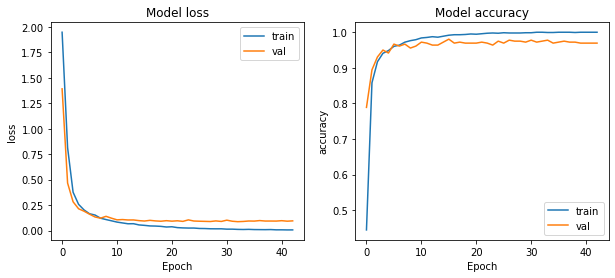

In [18]:
plot_metrics(history, metrics=['loss', 'accuracy'])

#### Question 1D: Plot a histogram of your weights from a particular layer (it must have at least 50 neurons)

**The weights can be obtained by using the get_weights() function in the history object. This contains weights for each layer in the form of a list. There are 2 entries in this list for each layer - (1) the entry for the weights matrix (multidimensional depending on the number of features) and the (2) the bias weights (single dimension)**

**Note:** We can pick either the 1st layer or the second layer to visualize the weights since these will have more than 50 neurons. From the plot below, we notice that the weights are more or less normally distributed and around the same range. This is likely due to the fact that we standardized the inputs before training the model.

In [0]:

def plot_weights(weights: List[np.array], verbose: bool = True):
  """
  Given a list of list of neural network weights, this function will plot them
  :param weights: A list where each entry is a numpy array containing the weights for a layer.
                  Each later must have 2 entries in the list 
                  (1) The first one for the weights matrix and 
                  (2) The second one for the bias matrix
  :type weights List[np.array]
  :param verbose Whether to print the shape of the weights for each layer (Default: True)
  :type verbose: bool
  """
  from math import floor
  fig, axes = plt.subplots(int(len(weights)/2), 2, figsize=(12,9))
  for num, weight in enumerate(weights):
    if verbose:
      if num%2 == 0:
        print(f"Layer {floor(num/2) + 1} Weight Matrix Shape: {weight.shape}")
      elif num%2 == 1:
        print(f"Layer {floor(num/2) + 1} Bias Matrix Shape: {weight.shape}")
    _ = axes[floor(num/2), num%2].hist(weight)
  plt.show

In [20]:
weights = history.model.get_weights()
print(type(weights))
print(len(weights))

<class 'list'>
6


Layer 1 Weight Matrix Shape: (64, 128)
Layer 1 Bias Matrix Shape: (128,)
Layer 2 Weight Matrix Shape: (128, 64)
Layer 2 Bias Matrix Shape: (64,)
Layer 3 Weight Matrix Shape: (64, 10)
Layer 3 Bias Matrix Shape: (10,)


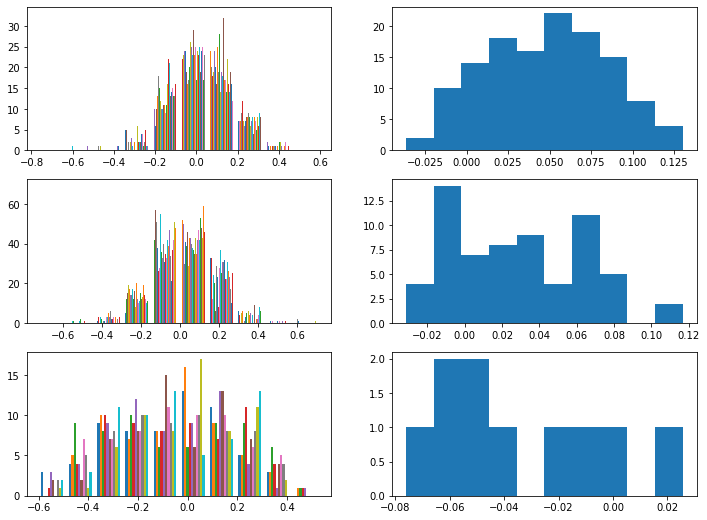

In [21]:
plot_weights(weights)

## 1.2 Regression Problem (Boston Housing)

In [0]:
data = datasets.load_boston()
X = data['data']
y = data['target']

In [23]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


### Scaling the Data

**The features do not seem to be on the same scale. Hence we will perform min-max scaling to being all the features to the same scale. This will assist the optimizer in converging faster to the minima.**

In [24]:
print(np.max(X, axis=0))

[ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      22.     396.9     37.97  ]


In [25]:
print(np.min(X, axis=0))

[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 3.2000e-01
 1.7300e+00]


In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [27]:
print(np.max(X_scaled, axis=0))
print(np.min(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Train/Validation Split

#### Question 1A: How did you know when you were done training?

**Similar to the classification problem, we will split this into a train and validation split and use early stopping to determine when the training is complete.**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


#### Question 1B: How did you optimize your parameters?

Similar to the classification problem, **Adam optimizer** was used for optimizing the parameters in the model. The difference is that the metric used to calculate the loss was **`mean squared error`** (compared to accuracy in the classification problem).

The decisions to choose the hyperparameters was made based on the same arguments laid out in the classification problem. The only exception was that since this is a regression problem, the last layer used a linear activation function to allow any numeric value for the output (not limiting to be between 0 and 1).


In [0]:
shutil.rmtree("./logs", ignore_errors=True) # deletes a directory and all its contents
tb = TensorBoard()
# If validation error does not improve for 10 epochs, then terminate the training
es = EarlyStopping(min_delta=0,patience=10)  

In [0]:
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1 ,activation='linear'))  # Question: Housing should not have negative values. So can we use 'relu' here instead of 'linear' activation?

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [32]:
tf.random.set_seed(42)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1000, batch_size=32, callbacks=[tb, es])

Epoch 1/1000
13/13 [==============================] - 0s 11ms/step - loss: 590.2484 - mean_squared_error: 590.2484 - val_loss: 495.5122 - val_mean_squared_error: 495.5122
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 536.9777 - mean_squared_error: 536.9777 - val_loss: 431.9080 - val_mean_squared_error: 431.9080
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 452.5132 - mean_squared_error: 452.5132 - val_loss: 330.0299 - val_mean_squared_error: 330.0299
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 323.0399 - mean_squared_error: 323.0399 - val_loss: 200.1168 - val_mean_squared_error: 200.1168
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 190.8923 - mean_squared_error: 190.8923 - val_loss: 112.2473 - val_mean_squared_error: 112.2473
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 122.4338 - mean_squared_error: 122.4338 - val_loss: 108.0064 - val_mean_squ

#### Question 1C. Plot your training/validation curves to bolster your arguments

**Similar to what we saw in the classification problem, we notice early stopping coming into picture here. Although we ran the training for 1000 epochs, it got terminates at around 260 epochs since the validation metric did not improve for 10 epochs. Again, we dont see any indication of overfitting here as the validation loss and accuracy are very close to the corresponding training counterparts.**

In [0]:
# ## This does not render in the notbook after saving. Hence we will use a custom function to plot this.
# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# %tensorboard --logdir logs

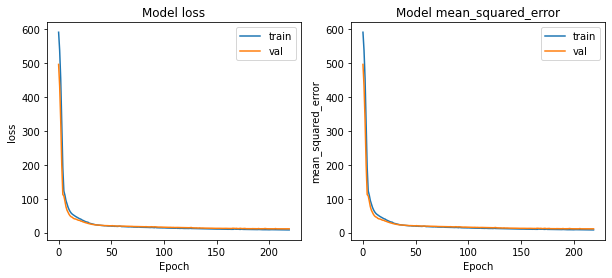

In [34]:
plot_metrics(history, metrics=['loss', 'mean_squared_error'])

#### Question 1D: Plot a histogram of your weights from a particular layer (it must have at least 50 neurons)

**The weights can be obtained in a similar manner as in the classification problem.**

**Note:** We can pick either the 1st layer or the 2nd layer to visualize the weights since these will have more than 50 neurons. 

In [35]:
weights = history.model.get_weights()
print(type(weights))
print(len(weights))

<class 'list'>
6


Layer 1 Weight Matrix Shape: (13, 128)
Layer 1 Bias Matrix Shape: (128,)
Layer 2 Weight Matrix Shape: (128, 64)
Layer 2 Bias Matrix Shape: (64,)
Layer 3 Weight Matrix Shape: (64, 1)
Layer 3 Bias Matrix Shape: (1,)


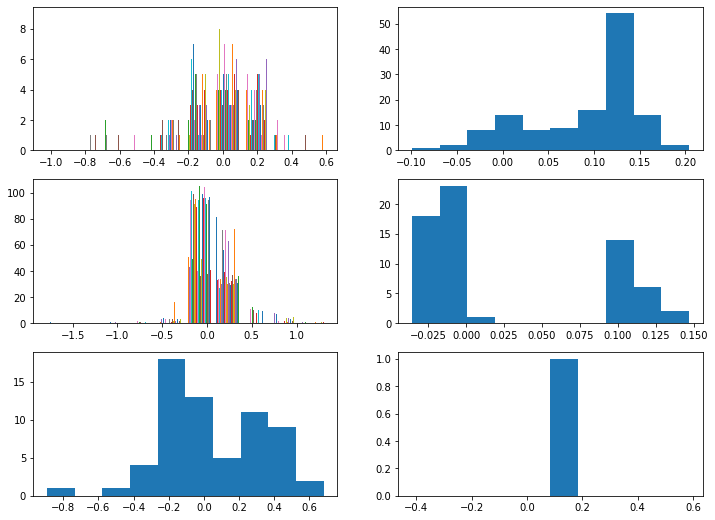

In [36]:
plot_weights(weights)

# 2.0 Web Scraping

Scrape the top 100 Billboard Artists from [this website](https://www.billboard.com/charts/hot-100). Your answer must be a function that I can run from my computer so that I can get a list of the artist, song, and position.

In [37]:
!pip3 install requests
!pip3 install beautifulsoup4

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [0]:
def getTop100(URL: str = 'https://www.billboard.com/charts/hot-100') -> pd.DataFrame:
  """
  Returns the top 100 Billboard Songs and Artists from the website 'url'
  This function assumes that the webpage has a certain structure
  Rank is indicated by a tag with class="chart-element__rank__number"
  Song is indicated by a tag with class="chart-element__information__song text--truncate color--primary"
  Artist is indicated by a tag with class="chart-element__information__artist text--truncate color--secondary"
  :param url: Website containing the data for the top 100 songs and artists.
              Default: https://www.billboard.com/charts/hot-100
  :type url: str
  :rtype pd.DataFrame
  """
  page = requests.get(URL)  # Get the page
  soup = BeautifulSoup(page.content, 'html.parser')  # Parse the page
  entries = soup.find_all("li", class_="chart-list__element display--flex")  ## Find the Table
  data = pd.DataFrame(columns=["Rank", "Song", "Artist"])  # Define the dataframe to hold the data
  
  # For each entry in the table, read the data and add to the dataframe
  for entry in entries:
    # Get Rank
    rank_tag = entry.find_all(
        "span", class_="chart-element__rank__number")[0]
    # Get Song
    song_tag = entry.find_all(
        "span", class_="chart-element__information__song text--truncate color--primary")[0]
    # Get Artist
    artist_tag = entry.find_all(
        "span", class_="chart-element__information__artist text--truncate color--secondary")[0]
    
    # Append the data to the dataframe
    row = pd.DataFrame(
        data = {"Rank": rank_tag.getText(), "Song": song_tag.getText(), "Artist": artist_tag.getText()},
        index=[0]
    )
    all_dfs = [data, row]
    data = pd.concat(all_dfs)

  # Housekeeping
  data.reset_index(drop=True, inplace=True) 
  data['Rank'] = data['Rank'].astype(int)

  return data

In [40]:
getTop100()

,Rank,Song,Artist
0,1,The Scotts,"THE SCOTTS, Travis Scott & Kid Cudi"
1,2,Blinding Lights,The Weeknd
2,3,Toosie Slide,Drake
3,4,Savage,Megan Thee Stallion Featuring Beyonce
4,5,The Box,Roddy Ricch
...,...,...,...
95,96,NASTY,DaBaby Featuring Ashanti & Megan Thee Stallion
96,97,Drinking Alone,Carrie Underwood
97,98,PTSD,"G Herbo Featuring Chance The Rapper, Juice WRL..."
98,99,Thug Of Spades,YoungBoy Never Broke Again Featuring DaBaby
